<h1>Most Frequent Best Action</h1>


<h2> MFBA - Training </h2>

Here we can compute the most common bast action fixed trajectory over the training set in the vision and touch grasping setting. We set greedy_checks to 5 so that only 5 actions are check for every object, this approximation greatly increases speed at the cost of some accuracy. 

In [1]:
import os
from pterotactyl.policies.dataset_specific import MFBA


class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "MFBA_example"
        self.finger = False 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = True
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = False 
        self.greedy_checks = 5
        self.pretrained_recon = True
        self.pretrained=False
        
    

params = Params()
trainer = MFBA.Engine(params)
trainer()

pybullet build time: Sep 20 2021 20:33:29
/private/home/ejsmith/.conda/envs/cluster/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2240.04it/s]


The number of RL_train set objects found : 122


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 33222.87it/s]


The number of valid set objects found : 34
argv[0]=
argv[0]=
Getting best action for step 1


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [00:51<00:00,  1.19it/s]


Getting best action for step 2


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [01:00<00:00,  1.01it/s]


Getting best action for step 3


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [01:07<00:00,  1.10s/it]


Getting best action for step 4


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [01:13<00:00,  1.21s/it]


Getting best action for step 5


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [01:22<00:00,  1.36s/it]


<h2> MFBA
- Evaluation </h2>

We now evaluate the trained moddel. Because we run with the visualize paramater as true we can view predicted objects. 

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 3730.67it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:01<00:09,  1.98s/it]

Valid || score: 0.9701, reward = 0.0299


 33%|███████████████████████████▋                                                       | 2/6 [00:03<00:07,  1.89s/it]

Valid || score: 0.9294, reward = 0.0706


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:05<00:05,  1.81s/it]

Valid || score: 0.8504, reward = 0.1496


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:07<00:03,  1.77s/it]

Valid || score: 1.0338, reward = -0.0338


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:08<00:01,  1.76s/it]

Valid || score: 1.0288, reward = -0.0288


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:10<00:01,  1.76s/it]

Valid || score: 0.8652, reward = 0.1348
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.37s/it]


percentage in vision is 60.00 % for policy
******************************
*********************************************
Total Valid || score: 0.9463, reward = 0.0537
*********************************************


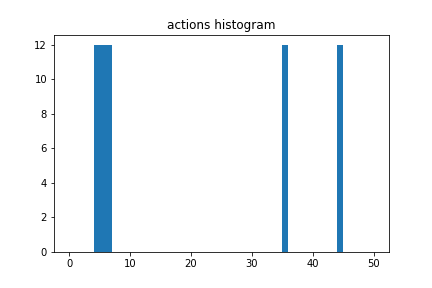




   Projected Actions


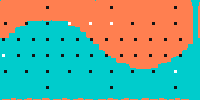

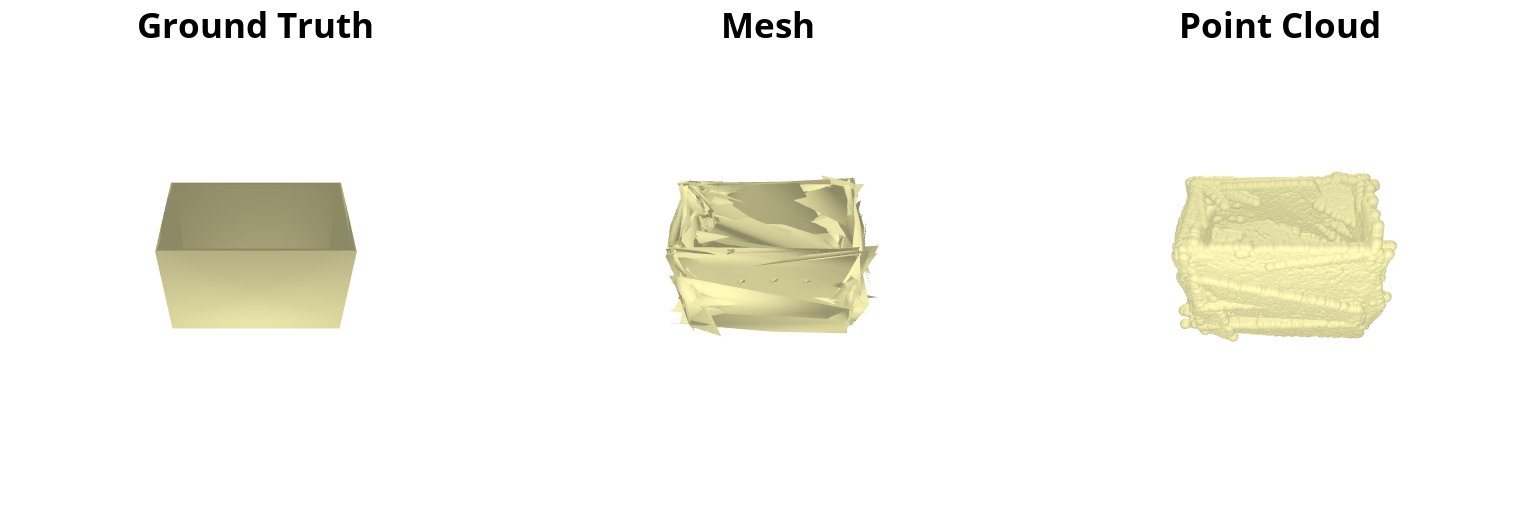

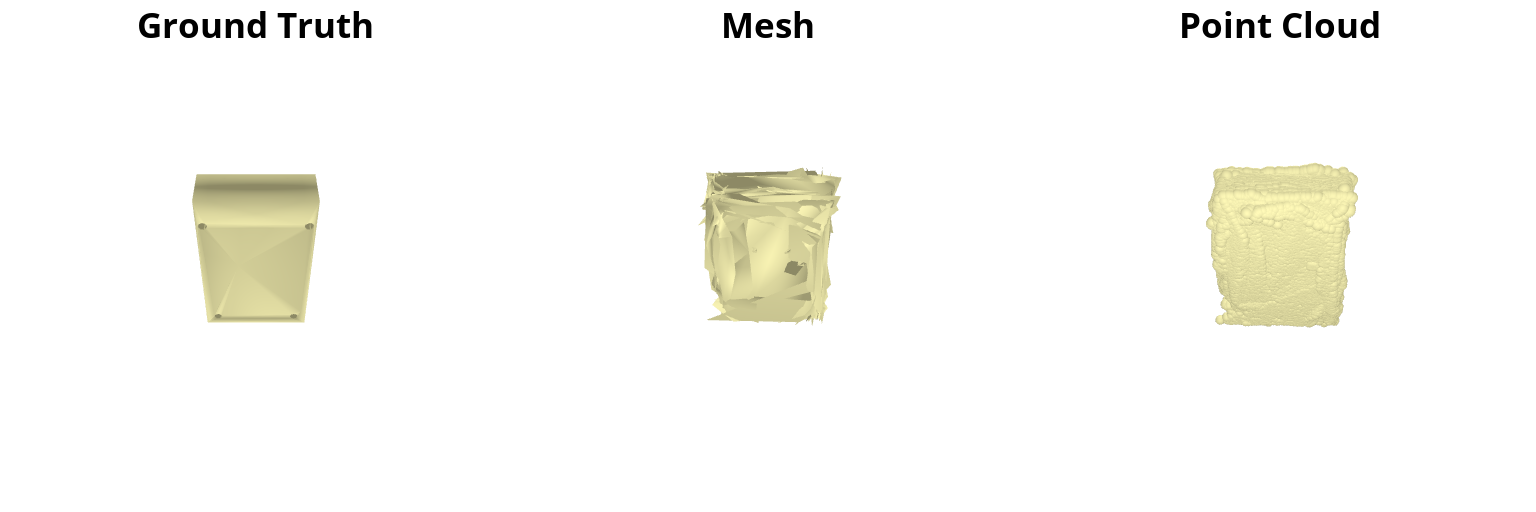

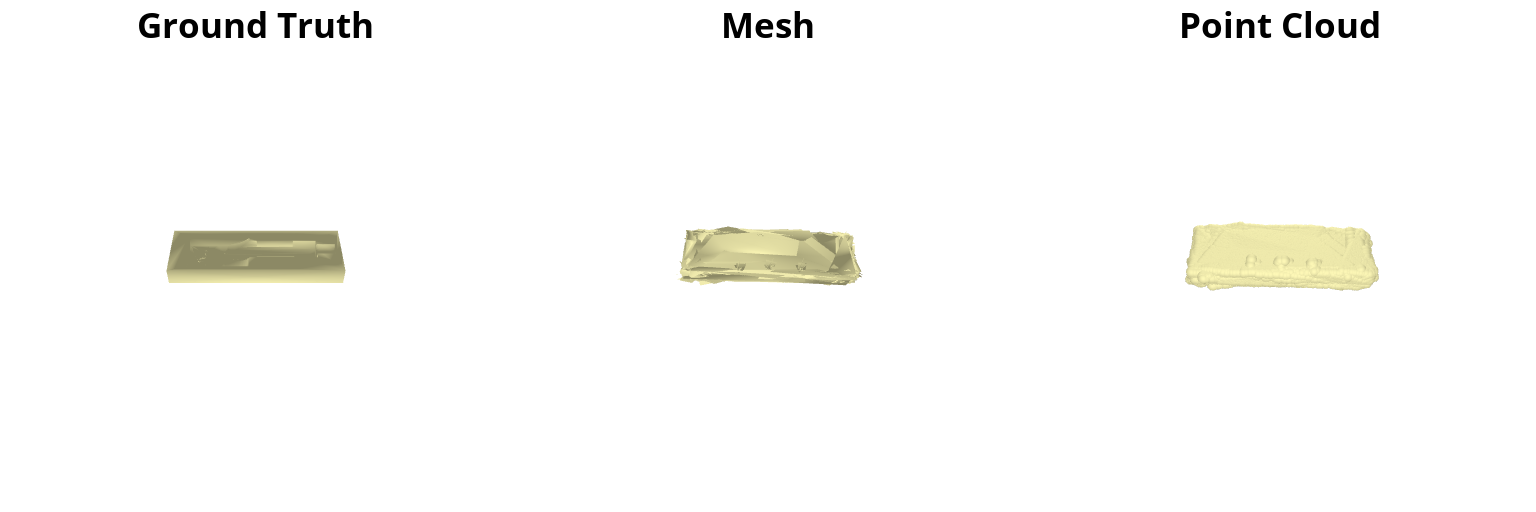

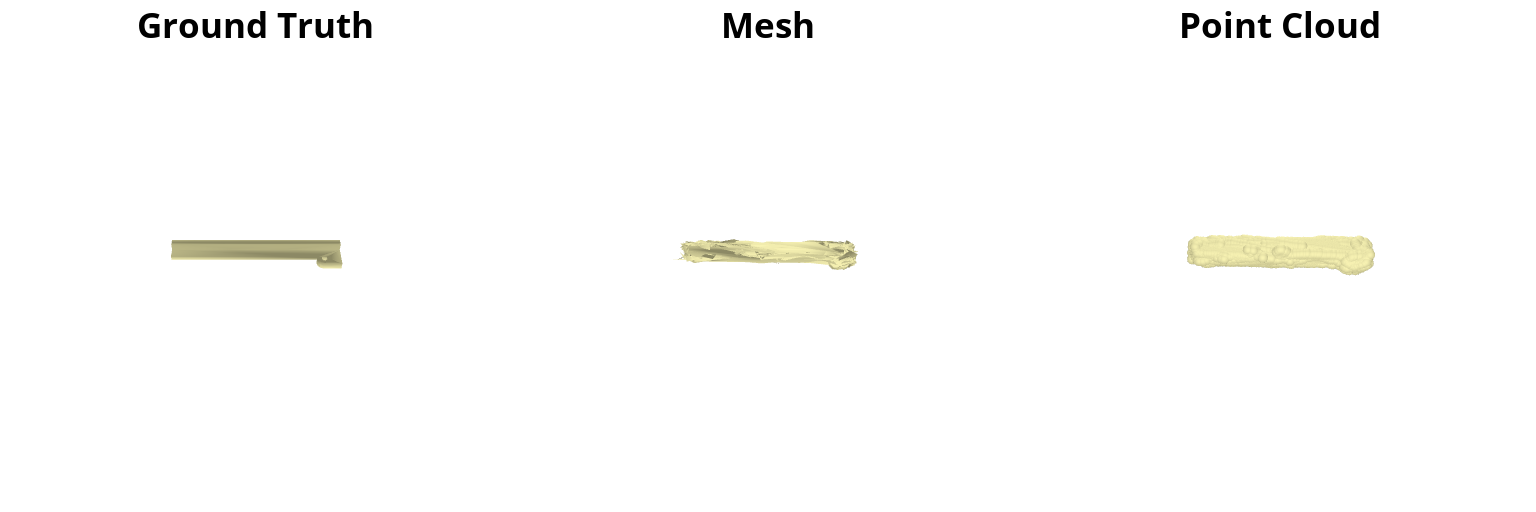

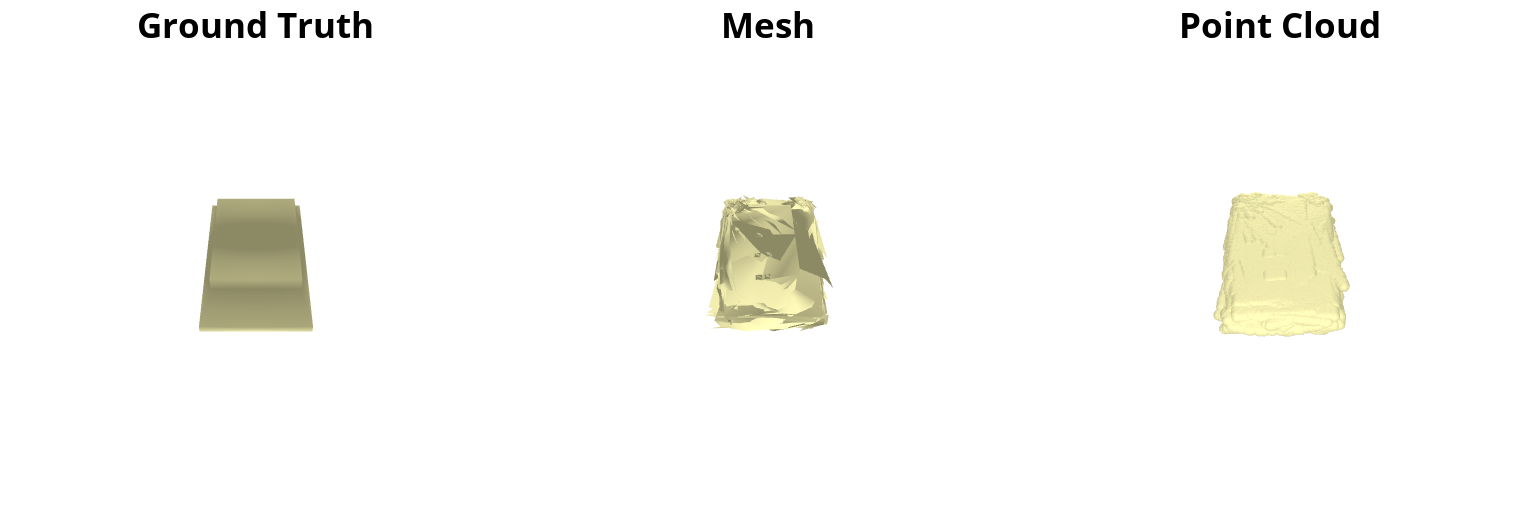

In [2]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


params.eval = True 
params.visualize = True
tester = MFBA.Engine(params)
tester()


histogram = Image.open('results/MFBA_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/MFBA_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/MFBA_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)

<h2> MFBA - Pretrained </h2>

We now evaliate the pretrained models in the same setting: 

100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 18149.70it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:02<00:10,  2.19s/it]

Valid || score: 0.9749, reward = 0.0251


 33%|███████████████████████████▋                                                       | 2/6 [00:04<00:07,  1.97s/it]

Valid || score: 0.9117, reward = 0.0883


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:05<00:05,  1.90s/it]

Valid || score: 0.8783, reward = 0.1217


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:07<00:03,  1.87s/it]

Valid || score: 1.0715, reward = -0.0715


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:09<00:01,  1.86s/it]

Valid || score: 1.1208, reward = -0.1208


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:11<00:01,  1.86s/it]

Valid || score: 0.8669, reward = 0.1331
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.47s/it]


percentage in vision is 60.00 % for policy
******************************
*********************************************
Total Valid || score: 0.9707, reward = 0.0293
*********************************************


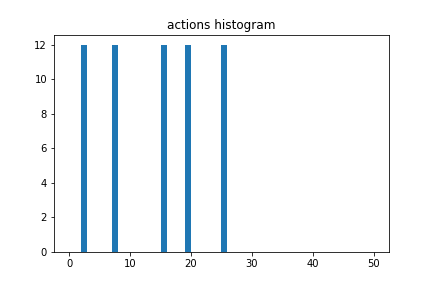




   Projected Actions


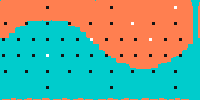

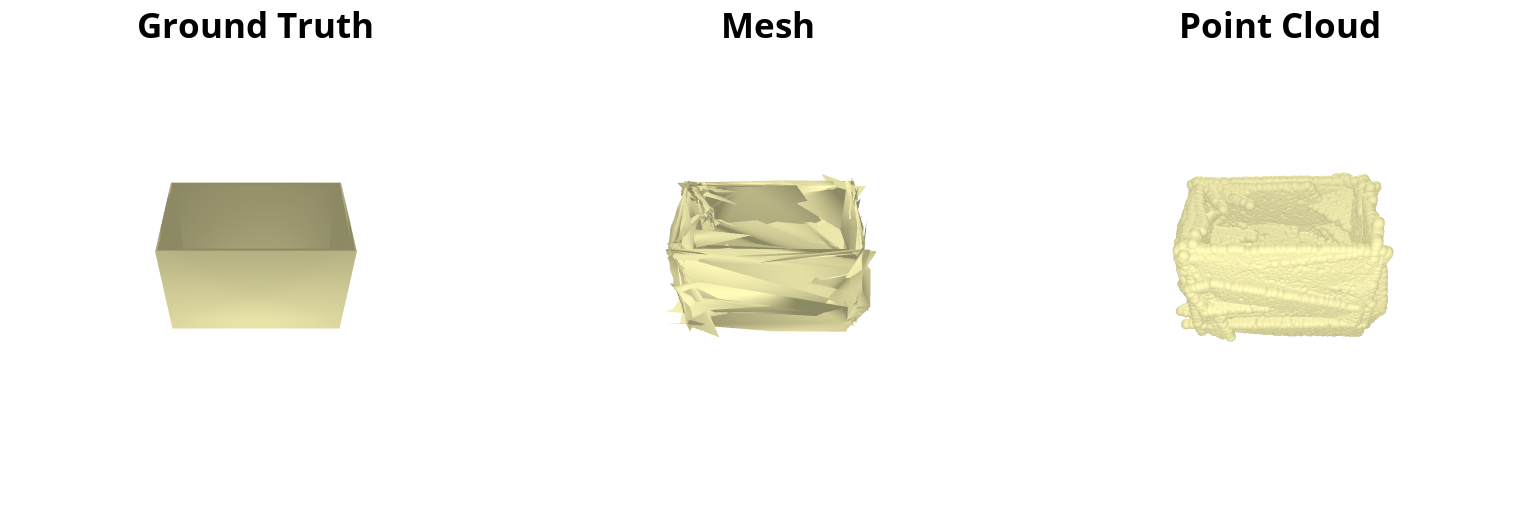

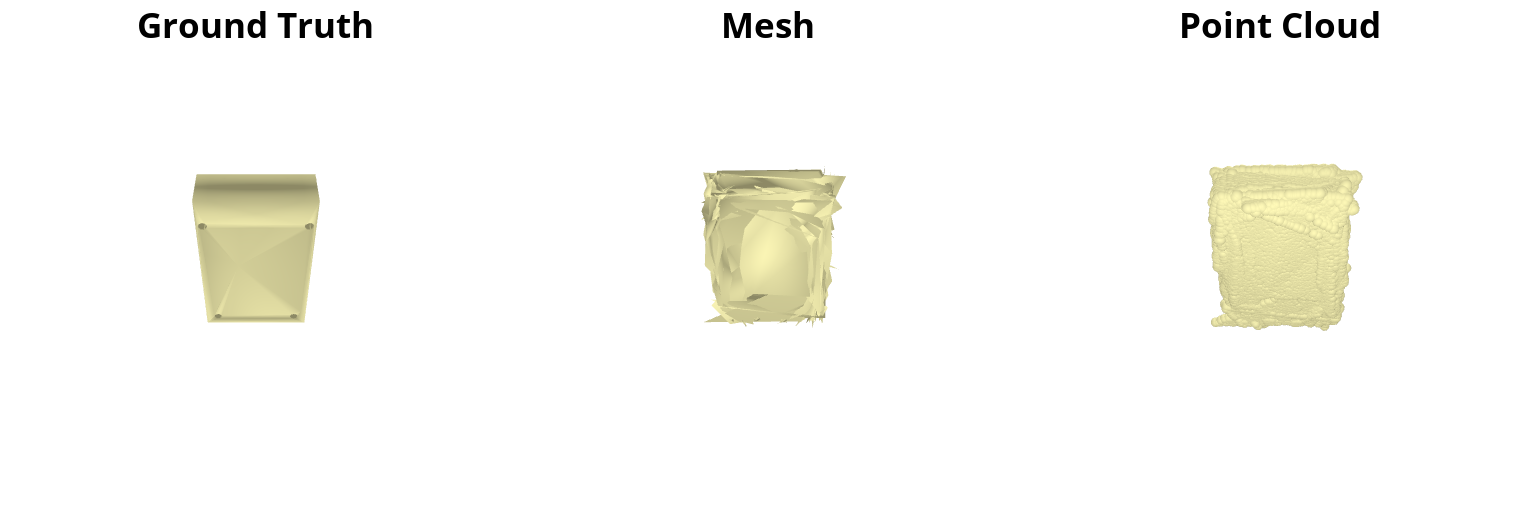

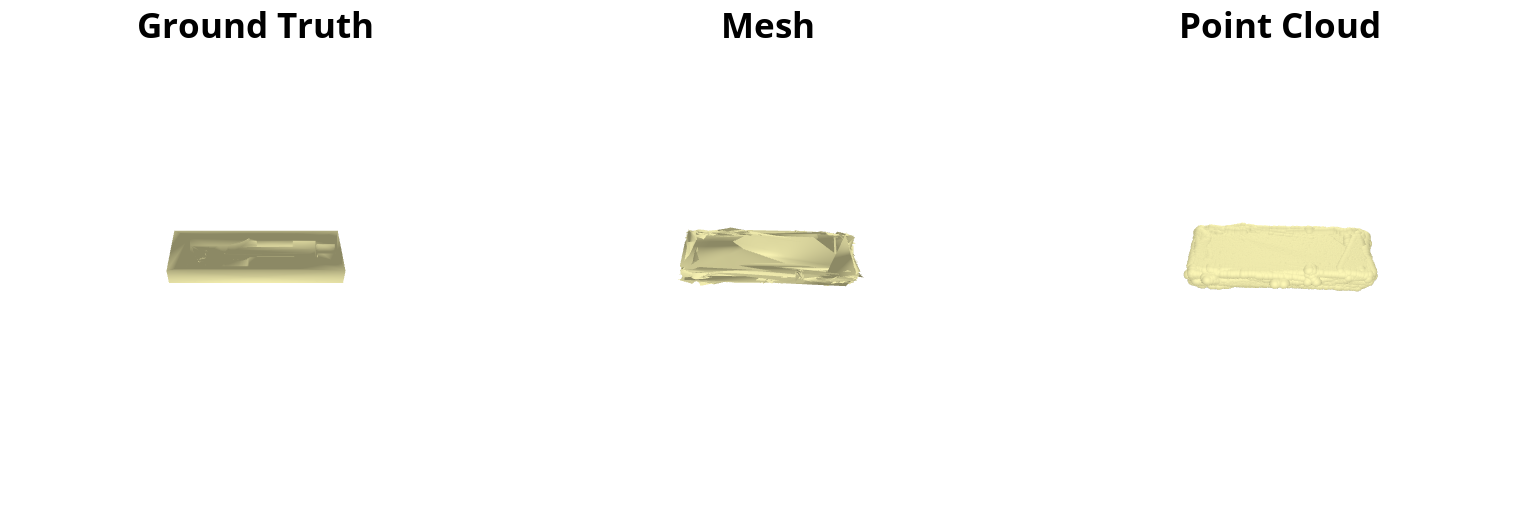

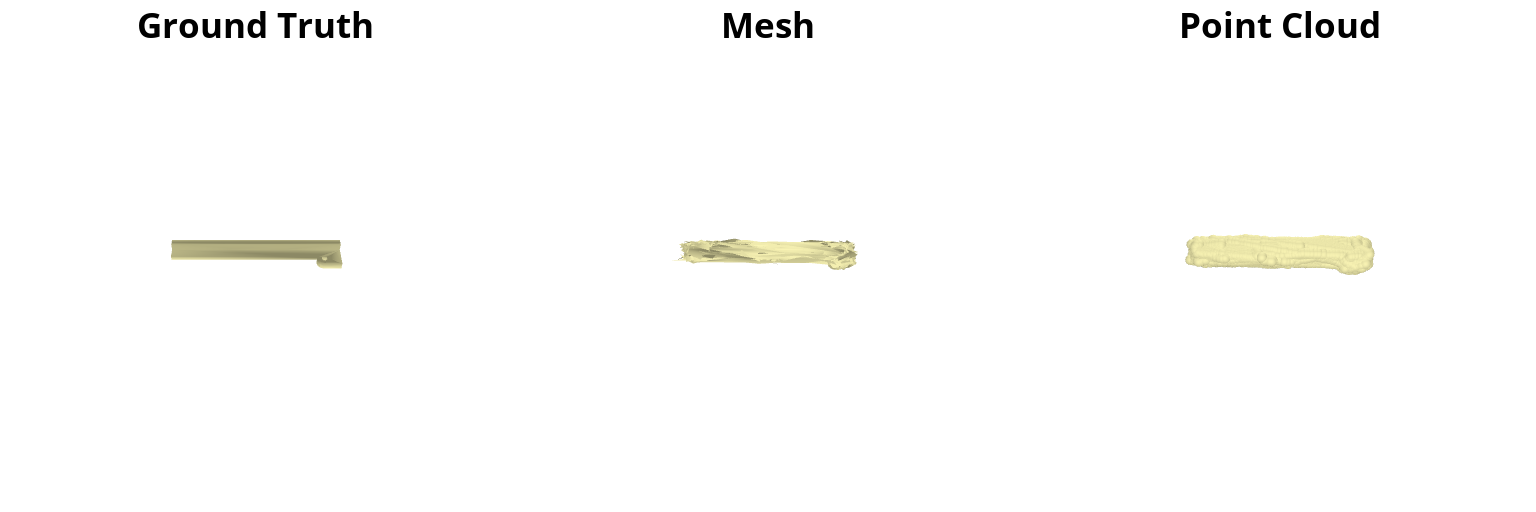

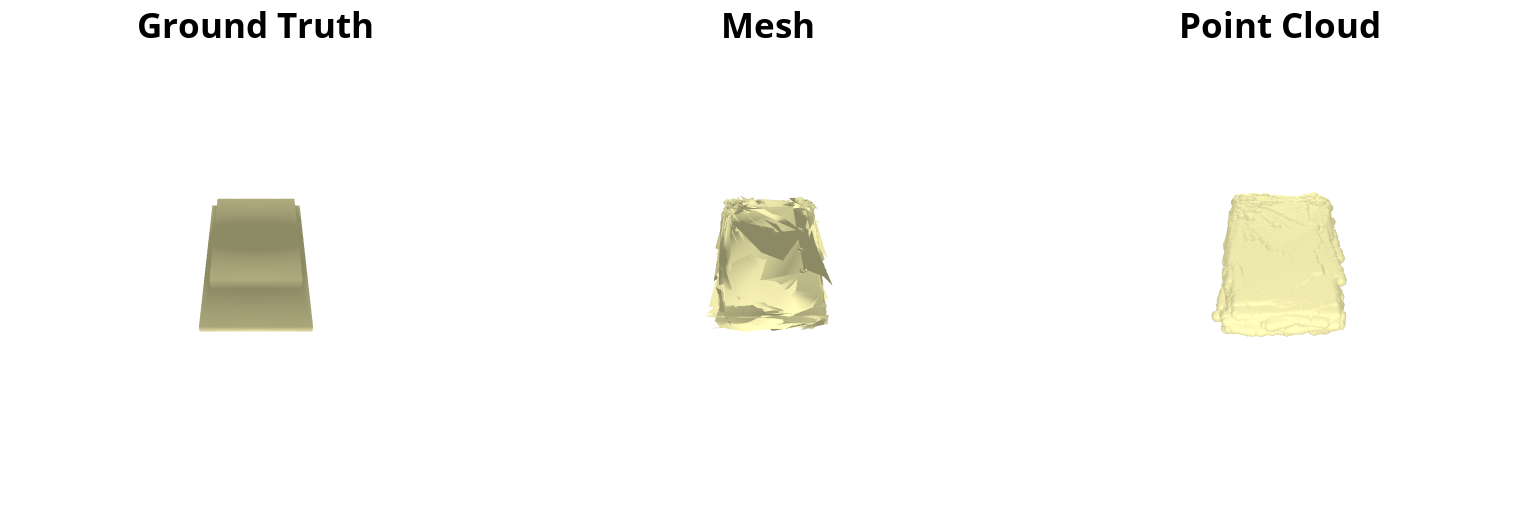

In [3]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
from pterotactyl.policies.dataset_specific import MFBA

FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'



class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "MFBA_pre"
        self.finger = False 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = True
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = True 
        self.greedy_checks = 5
        self.pretrained_recon = True
        self.pretrained = True 
        
    

params = Params()
eval = MFBA.Engine(params)
eval()

histogram = Image.open('results/MFBA_pre/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/MFBA_pre/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/MFBA_pre/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)